<a href="https://colab.research.google.com/github/PhoenixStormJr/RVC-v2-easy-GUI-glitches-fixed/blob/main/EasyGUI_fixed_glitches_%F0%9F%8E%AE_10_02_2024__12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[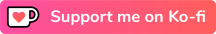](https://ko-fi.com/rejekts)

Link to original: https://colab.research.google.com/drive/1qfz5u2xBLyZp7vqzOAKZ3aJFjXZfHTuB

Link to google drive: https://drive.google.com/drive/my-drive

(optionally) polish up an RVC dataset with this colab notebook (Ultimate Vocal Remover FORK): https://colab.research.google.com/github/PhoenixStormJr/RVC-v2-easy-GUI-glitches-fixed/blob/main/UVR5_NO_UI_Prepare_RVC_dataset.ipynb

In [ ]:
#@title  **Install RVC** (17 minutes)

%cd /content
from IPython.display import clear_output
from ipywidgets import Button
import subprocess, shlex, os
from google.colab import drive

save_to_drive=True#@param {type:"boolean"}
load_weights_from_drive = True #@param{type:"boolean"}
load_logs_from_drive = True #@param{type:"boolean"}


#This is the new requirements file:
#Changed:
#matplotlib==3.9.4
RequirementsText="""aria2
joblib>=1.1.0
numba==0.56.4
numpy==1.23.5
scipy
librosa==0.9.1
llvmlite==0.39.0
fairseq==0.12.2
faiss-cpu==1.7.3
gradio==3.34.0
Cython
pydub>=0.25.1
soundfile>=0.12.1
ffmpeg-python>=0.2.0
tensorboardX
Jinja2>=3.1.2
json5
Markdown
matplotlib==3.9.4
matplotlib-inline>=0.1.3
praat-parselmouth>=0.4.2
Pillow>=9.1.1
resampy>=0.4.2
scikit-learn
tensorboard
tqdm>=4.63.1
tornado>=6.1
Werkzeug>=2.2.3
uc-micro-py>=1.0.1
sympy>=1.11.1
tabulate>=0.8.10
PyYAML>=6.0
pyasn1>=0.4.8
pyasn1-modules>=0.2.8
fsspec>=2022.11.0
absl-py>=1.2.0
audioread
uvicorn>=0.21.1
colorama>=0.4.5
pyworld==0.3.2
httpx
onnxruntime; sys_platform == 'darwin'
onnxruntime-gpu; sys_platform != 'darwin'
torchcrepe==0.0.20
fastapi==0.88
torchfcpe
ffmpy==0.3.1
python-dotenv>=1.0.0
av"""



if save_to_drive:
    try:
        from google.colab import auth
        from pydrive2.auth import GoogleAuth
        from oauth2client.client import GoogleCredentials
        from pydrive2.drive import GoogleDrive
        auth.authenticate_user()
        gauth = GoogleAuth()
        gauth.credentials = GoogleCredentials.get_application_default()
        my_drive = GoogleDrive(gauth)
        while not os.path.exists('/content/drive'):
          drive.mount('/content/drive')
          if not os.path.exists('/content/drive'):
            print("Timeout exceeded. Trying again...")
        drive_trash = my_drive.ListFile({'q': "trashed = true"}).GetList()
    except Exception as e:
        print(e)

def accellerator():
  returnValue = ""
  if len(os.environ["COLAB_GPU"]) > 0:
    returnValue = "GPU"
  elif "COLAB_TPU_ADDR" in os.environ and os.environ["COLAB_TPU_ADDR"]:
    returnValue = "TPU"
  else:
    returnValue = "CPU"
  return returnValue


if ((not "installed" in locals()) and (not "installed" in globals())) and (not os.path.exists('/content/installed.txt')):
    #Install the correct version of python. (3.10) This sucks I know...
    #Solves error with numba:
    #Collecting numba==0.56.4 (from -r requirements.txt (line 3))
    #  Downloading numba-0.56.4.tar.gz (2.4 MB)
    #     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 10.6 MB/s eta 0:00:00
    #  error: subprocess-exited-with-error
    #
    #  × python setup.py egg_info did not run successfully.
    #  │ exit code: 1
    #  ╰─> See above for output.
    #
    #  note: This error originates from a subprocess, and is likely not a problem with pip.
    #  Preparing metadata (setup.py) ... error
    #error: metadata-generation-failed
    #
    #× Encountered error while generating package metadata.
    #╰─> See above for output.
    #
    #note: This is an issue with the package mentioned above, not pip.
    !sudo apt install  python3.10 python3.10-venv python3.10-dev python3.10-minimal python3.10-distutils
    !curl -O https://bootstrap.pypa.io/get-pip.py
    #!sudo ln -sf /usr/bin/python3.10 /usr/bin/python3
    #!sudo ln -sf /usr/bin/python3.10 /usr/bin/python
    !python3.10 get-pip.py
    var = "We"+"bU"+"I"
    test = "Voice"
    c_word = "Conversion"
    r_word = "Retrieval"
    partial_name = "till"
    !git clone https://github.com/RVC-Project/{r_word}-based-{test}-{c_word}-{var} /content/RVC
    !apt -y install -qq aria2
    pretrains = ["f0D32k.pth","f0G32k.pth"]
    new_pretrains = ["f0Ov2Super32kD.pth","f0Ov2Super32kG.pth"]
    for file in pretrains:
        if not os.path.exists(f"/content/RVC/assets/pretrained_v2/{file}"):
            command = "aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/lj1995/%s%s%s/resolve/main/pretrained_v2/%s -d /content/RVC/assets/pretrained_v2 -o %s" % ("Voice","Conversion","WebUI",file,file)
            try:
                subprocess.run(shlex.split(command))
            except Exception as e:
                print(e)
    for file in new_pretrains:
        if not os.path.exists(f"/content/RVC/assets/pretrained_v2/{file}"):
            command = "aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/poiqazwsx/Ov2Super32kfix/resolve/main/%s -d /content/RVC/assets/pretrained_v2 -o %s" % (file,file)
            try:
                subprocess.run(shlex.split(command))
                print(shlex.split(command))
            except Exception as e:
                print(e)
    !mkdir -p /content/dataset && mkdir -p /content/RVC/audios
    !wget -nc https://raw.githubusercontent.com/RejektsAI/EasyTools/main/original -O /content/RVC/original.py
    !wget -nc https://raw.githubusercontent.com/luisesan{partial_name}an/project/refs/heads/main/demo.py -O /content/RVC/demo.py
    !wget -nc https://huggingface.co/PhoenixStormJr/RVC-Easy-GUI-BACKUP-ONLY/resolve/main/easyfuncs.py -O /content/RVC/easyfuncs.py
    !wget -nc https://huggingface.co/Rejekts/project/resolve/main/download_files.py -O /content/RVC/download_files.py
    !wget -nc https://huggingface.co/Rejekts/project/resolve/main/a.png -O /content/RVC/a.png
    !wget -nc https://huggingface.co/Rejekts/project/resolve/main/easy_sync.py -O /content/RVC/easy_sync.py
    !wget -nc https://huggingface.co/spaces/Rejekts/RVC_PlayGround/raw/main/app.py -O /content/RVC/playground.py
    !wget -nc https://huggingface.co/spaces/Rejekts/RVC_PlayGround/raw/main/tools/useftools.py -O /content/RVC/tools/useftools.py
    !wget -nc https://huggingface.co/Rejekts/project/resolve/main/astronauts.mp3 -O /content/RVC/audios/astronauts.mp3
    !wget -nc https://huggingface.co/Rejekts/project/resolve/main/somegirl.mp3 -O /content/RVC/audios/somegirl.mp3
    !wget -nc https://huggingface.co/Rejekts/project/resolve/main/someguy.mp3 -O /content/RVC/audios/someguy.mp3
    !wget -nc https://huggingface.co/Rejekts/project/resolve/main/unchico.mp3 -O /content/RVC/audios/unchico.mp3
    !wget -nc https://huggingface.co/Rejekts/project/resolve/main/unachica.mp3 -O /content/RVC/audios/unachica.mp3
    RequirementsFile = open("/content/RVC/requirements.txt", "w")
    RequirementsFile.write(RequirementsText)
    RequirementsFile.close()
    !cd /content/RVC && python3.10 /content/RVC/download_files.py
    if accellerator() == "CPU":
      !rm -rf /content/RVC/infer/modules/vc/modules.py
      !wget -nc https://huggingface.co/PhoenixStormJr/RVC-Easy-GUI-BACKUP-ONLY/resolve/main/modules-cpu.py -O /content/RVC/infer/modules/vc/modules.py
    !rm -rf /content/RVC/infer/lib/train/data_utils.py
    !wget -nc https://huggingface.co/PhoenixStormJr/RVC-Easy-GUI-BACKUP-ONLY/resolve/main/data_utils.py -O /content/RVC/infer/lib/train/data_utils.py
    !python3.10 -m pip install --upgrade pip==24.0
    %cd /content/RVC
    !python3.10 -m pip install -r requirements.txt
    !python3.10 -m pip install mega.py gdown==4.6.0 pytube pydub gradio==4.44.0
    !python3.10 -m pip install -Uqq WhisperSpeech==0.8.9 webdataset torch==2.5.0
    !python3.11 -m pip install faiss-cpu==1.7.3 pydub numpy==1.26.4
    import numpy as np
    import faiss
    %cd /content/RVC
    if not os.path.exists("/content/RVC/audiosr"):
        !pip install virtualenv
        !virtualenv audiosr
        !source audiosr/bin/activate; pip install audiosr
    if not os.path.exists("/content/sepenv"):
        !virtualenv sepenv
    !source sepenv/bin/activate; pip install "audio-separator[gpu]"


if save_to_drive:
    try:
        from RVC.easy_sync import GarbageMan
        kevin = GarbageMan()
        kevin.start(path=drive_trash,every=40,pattern="[GD]_*.pth")
    except Exception as e:
        print(e)
from RVC.easy_sync import Channel
logs_folder ='/content/drive/MyDrive/project-main/logs'
weights_folder = '/content/drive/MyDrive/project-main/assets/weights'
if not "logs_backup" in locals(): logs_backup = Channel('/content/RVC/logs',logs_folder,every=30,exclude="mute")
if not "weights_backup" in locals(): weights_backup = Channel('/content/RVC/assets/weights',weights_folder,every=30)
if os.path.exists('/content/drive/MyDrive'):
    if not os.path.exists(logs_folder): os.makedirs(logs_folder)
    if not os.path.exists(weights_folder): os.makedirs(weights_folder)
    logs_backup.start()
    weights_backup.start()



if ((not "installed" in locals()) and (not "installed" in globals())) and (not os.path.exists('/content/installed.txt')):
    import shutil
    %cd /content/RVC
    py = "demo.py"
    if os.path.exists('/content/drive/MyDrive/project-main'):
      print("Copying models from Google Drive. Be patient... This will take like 20 minutes.")
      if load_weights_from_drive:
        for file in os.listdir('/content/drive/MyDrive/project-main/assets/weights'):
          try:
            print(f'copying "/content/drive/MyDrive/project-main/assets/weights/{file}" to: "/content/RVC/assets/weights/{file}"')
            shutil.copy2(f'/content/drive/MyDrive/project-main/assets/weights/{file}','/content/RVC/assets/weights/')
          except: print(f"Error loading {file}\n{error}")
      if load_logs_from_drive:
        for file in os.listdir('/content/drive/MyDrive/project-main/logs'):
          try:
            print(f'copying "/content/drive/MyDrive/project-main/logs/{file}" to: "/content/RVC/logs/{file}"')
            shutil.copytree(f'/content/drive/MyDrive/project-main/logs/{file}',f'/content/RVC/logs/{file}')
          except Exception as error: print(f"Error loading {file}\n{error}")
    else:
      print("Google Drive not connected...")
    global installed
    installed=True
    open("/content/installed.txt", "w").write("True")





if((not "installed" in locals()) and (not "installed" in globals()) and (os.path.exists('/content/installed.txt'))):
  print("Intalled and restarted. You are ready to start voice cloning!")

if(("installed" in locals()) and ("installed" in globals()) and (os.path.exists('/content/installed.txt'))):
  print("\n\n\n\nPlease RESTART the runtime. At the top of your screen, click \"Runtime\" -> \"Restart session\". Then click \"Install RVC\" again. But don't worry, it will be quicker this time.\nPlease RESTART the runtime. At the top of your screen, click \"Runtime\" -> \"Restart session\". Then click \"Install RVC\" again. But don't worry, it will be quicker this time.\nPlease RESTART the runtime. At the top of your screen, click \"Runtime\" -> \"Restart session\". Then click \"Install RVC\" again. But don't worry, it will be quicker this time.\nPlease RESTART the runtime. At the top of your screen, click \"Runtime\" -> \"Restart session\". Then click \"Install RVC\" again. But don't worry, it will be quicker this time.")







Button(description="\u2714 Success", button_style="success")

In [ ]:
#@title 📱 **Open the GUI**
#@markdown <small> **KEEP IN MIND:** Google Colab has banned **FREE** tier users from the webui. But you can use the alternate method down below.
open_tensorboard=True #@param {type:"boolean"}

import os

if((not "installed" in locals()) and (not "installed" in globals()) and (os.path.exists('/content/installed.txt'))):
  if open_tensorboard:
      %load_ext tensorboard
      %tensorboard --logdir ./logs --port=8888
  !python3.10 {py} --colab
elif((not "installed" in locals()) and (not "installed" in globals()) and (not os.path.exists('/content/installed.txt'))):
  print("ERROR: You have not installed RVC. Please run the first cell. Yes it takes forever, but it's required.")
else:
  print("ERROR: You have installed RVC, however, you have not restarted the runtime. Please restart by clicking \"Runtime\" -> \"Restart session\". Then click \"Install RVC\" again. But don't worry, it will be quicker this time.")


## Manual Training

In [ ]:
#@title Create dataset from YouTube video
%cd /content

import os

def get_video_id(url):
    pattern = r"(?:v=|\/)([0-9A-Za-z_-]{11})"
    match = re.search(pattern, url)
    if match:
        return match.group(1)
    return None

def remove_parentheses(filename):
    # Get the directory and filename
    directory = os.path.dirname(filename)
    base_name = os.path.basename(filename)
    # Remove parentheses from the filename
    new_name = re.sub(r'[()]', '', base_name)
    # Join the new name with the directory
    new_path = os.path.join(directory, new_name)
    # Rename the file
    os.rename(filename, new_path)
    return new_path


if((not "installed" in locals()) and (not "installed" in globals()) and (os.path.exists('/content/installed.txt'))):
    youtube_url = "https://www.youtube.com/watch?v=P52rHqq-ugg" #@param {type:"string"}
    separation_folder = "/content/separation_files"
    dataset_folder = "/content/dataset"
    os.makedirs(separation_folder,exist_ok=True)
    if not "installed_yt" in locals():
        ! pip install -U yt-dlp -q
        ! wget -O - -q  https://github.com/yt-dlp/FFmpeg-Builds/releases/download/latest/ffmpeg-master-latest-linux64-gpl.tar.xz | xz -qdc| tar -x
        ! pip install pydub -q
        if not os.path.exists('/content/sepenv'):
            ! pip install virtualenv -q
            ! virtualenv sepenv
        #! source sepenv/bin/activate; python3.10 -m pip install ort-nightly-gpu --index-url=https://aiinfra.pkgs.visualstudio.com/PublicPackages/_packaging/ort-cuda-12-nightly/pypi/simple/

    installed_yt = True

    import re, os
    from yt_dlp import YoutubeDL
    from IPython.display import clear_output, display, Audio
    from ipywidgets import Button

    video_id = get_video_id(youtube_url)
    downloads_folder = "/content/downloads"
    os.makedirs(downloads_folder,exist_ok=True)
    video_url = f"https://youtu.be/{video_id}"
    output_name = f"{video_id}.wav"
    output_path = os.path.join(downloads_folder,output_name)
    ! yt-dlp -xv --ffmpeg-location ffmpeg-master-latest-linux64-gpl/bin --audio-format wav  -o $output_path -- {video_url}
    if os.path.exists(dataset_folder):
        delete = input(f"Do you want to delete the existing {dataset_folder} folder? (y/n)")
        if delete.lower() == 'y':
            ! rm -r $dataset_folder
            ! mkdir -p $dataset_folder
        else:
            print("Keeping the existing dataset folder.")

    # Remove the instrumental
    ! source sepenv/bin/activate; audio-separator $output_path --model_filename MDX23C-8KFFT-InstVoc_HQ_2.ckpt --output_dir {separation_folder}
    # Fix filename
    vocals_file = f"{separation_folder}/{video_id}_(Vocals)_MDX23C-8KFFT-InstVoc_HQ_2.flac"
    remove_parentheses(vocals_file)
    vocals_file = f"{separation_folder}/{video_id}_Vocals_MDX23C-8KFFT-InstVoc_HQ_2.flac"
    # Remove the Reverb
    ! source sepenv/bin/activate; audio-separator {vocals_file} --model_filename UVR-DeEcho-DeReverb.pth --output_dir {dataset_folder}
    ! rm final/*\(Reverb\)*.flac
    clear_output()
    Button(description="\u2714 Done",button_style="success")
elif((not "installed" in locals()) and (not "installed" in globals()) and (not os.path.exists('/content/installed.txt'))):
  print("ERROR: You have not installed RVC. Please run the first cell. Yes it takes forever, but it's required.")
else:
  print("ERROR: You have installed RVC, however, you have not restarted the runtime. Please restart by clicking \"Runtime\" -> \"Restart session\". Then click \"Install RVC\" again. But don't worry, it will be quicker this time.")


In [ ]:
#@title ⛏️ **Process**

import os
#from pytube import YouTube
from IPython.display import clear_output
from ipywidgets import Button
from google.colab import files

def calculate_audio_duration(file_path):
    duration_seconds = len(AudioSegment.from_file(file_path)) / 1000.0
    return duration_seconds

def UploadFileTo(FilePath):
  OriginalDirectory = os.getcwd()
  %cd {FilePath}
  files.upload()
  %cd {OriginalDirectory}

def train_index(exp_dir1, version19):
    exp_dir = "logs/%s" % (exp_dir1)
    os.makedirs(exp_dir, exist_ok=True)
    feature_dir = (
        "%s/3_feature256" % (exp_dir)
        if version19 == "v1"
        else "%s/3_feature768" % (exp_dir)
    )
    if not os.path.exists(feature_dir):
        return "Please perform feature extraction first!"
    listdir_res = list(os.listdir(feature_dir))
    if len(listdir_res) == 0:
        return "Please perform feature extraction first!"
    infos = []
    npys = []
    for name in sorted(listdir_res):
        phone = np.load("%s/%s" % (feature_dir, name))
        npys.append(phone)
    big_npy = np.concatenate(npys, 0)
    big_npy_idx = np.arange(big_npy.shape[0])
    np.random.shuffle(big_npy_idx)
    big_npy = big_npy[big_npy_idx]
    if big_npy.shape[0] > 2e5:
        infos.append("Trying to perform kmeans on %s shape to 10k centers." % big_npy.shape[0])
        yield "\n".join(infos)
        try:
            big_npy = (
                MiniBatchKMeans(
                    n_clusters=10000,
                    verbose=True,
                    batch_size=256 * config.n_cpu,
                    compute_labels=False,
                    init="random",
                )
                .fit(big_npy)
                .cluster_centers_
            )
        except:
            info = traceback.format_exc()
            logger.info(info)
            infos.append(info)
            yield "\n".join(infos)
    np.save("%s/total_fea.npy" % exp_dir, big_npy)
    n_ivf = min(int(16 * np.sqrt(big_npy.shape[0])), big_npy.shape[0] // 39)
    infos.append("%s,%s" % (big_npy.shape, n_ivf))
    yield "\n".join(infos)
    index = faiss.index_factory(256 if version19 == "v1" else 768, "IVF%s,Flat" % n_ivf)
    infos.append("training")
    yield "\n".join(infos)
    index_ivf = faiss.extract_index_ivf(index)  #
    index_ivf.nprobe = 1
    index.train(big_npy)
    faiss.write_index(
        index,
        "%s/trained_IVF%s_Flat_nprobe_%s_%s_%s.index"
        % (exp_dir, n_ivf, index_ivf.nprobe, exp_dir1, version19),
    )
    infos.append("adding")
    yield "\n".join(infos)
    batch_size_add = 8192
    for i in range(0, big_npy.shape[0], batch_size_add):
        index.add(big_npy[i : i + batch_size_add])
    faiss.write_index(
        index,
        "%s/added_IVF%s_Flat_nprobe_%s_%s_%s.index"
        % (exp_dir, n_ivf, index_ivf.nprobe, exp_dir1, version19),
    )
    infos.append(
        "Successfully built index, added_IVF%s_Flat_nprobe_%s_%s_%s.index"
        % (n_ivf, index_ivf.nprobe, exp_dir1, version19)
    )





if((not "installed" in locals()) and (not "installed" in globals()) and (os.path.exists('/content/installed.txt'))):
    %cd /content/RVC
    model_name = 'my_model' #@param {type:"string"}
    dataset_folder = '/content/drive/MyDrive/dataset' #@param {type:"string"}
    #if or_paste_a_youtube_link !="":
    #    youtube_to_wav(or_paste_a_youtube_link)
    from pydub import AudioSegment
    file_path = dataset_folder
    try:
        duration = calculate_audio_duration(file_path)
        if duration < 600:
            cache = True
        else:
            cache = False
    except:
        cache = False
    if(not os.path.exists(dataset_folder)):
        os.makedirs(dataset_folder)
    while len(os.listdir(dataset_folder)) < 1:
        print("Your dataset folder is empty. Please add some files.")
        UploadFileTo(dataset_folder)
    !mkdir -p ./logs/{model_name}
    with open(f'./logs/{model_name}/preprocess.log','w') as f:
        print("Starting...")
    !python3.10 infer/modules/train/preprocess.py {dataset_folder} 32000 2 ./logs/{model_name} False 3.0 > /dev/null 2>&1
    with open(f'./logs/{model_name}/preprocess.log','r') as f:
        if 'end preprocess' in f.read():
            display(Button(description="\u2714 Success", button_style="success"))
        else:
            print("Error preprocessing data... Make sure your dataset folder is correct.")
    f0method = "rmvpe_gpu" # @param ["pm", "harvest", "rmvpe", "rmvpe_gpu"]
    %cd /content/RVC
    with open(f'./logs/{model_name}/extract_f0_feature.log','w') as f:
        print("Starting...")
    #ADDED: GPU detector:
    if len(os.environ["COLAB_GPU"]) > 0:
      pass
    elif "COLAB_TPU_ADDR" in os.environ and os.environ["COLAB_TPU_ADDR"]:
      if(f0method == "rmvpe_gpu"):
        print("WARNING: No GPU connected, but you have f0method set to \"rmvpe_gpu\". Switching to: \"rmvpe\"")
        f0method = "rmvpe"
    else:
      if(f0method == "rmvpe_gpu"):
        print("WARNING: No GPU connected, but you have f0method set to \"rmvpe_gpu\". Switching to: \"rmvpe\"")
        f0method = "rmvpe"

    if f0method != "rmvpe_gpu":
        !python3.10 infer/modules/train/extract/extract_f0_print.py ./logs/{model_name} 2 {f0method}
    else:
        !python3.10 infer/modules/train/extract/extract_f0_rmvpe.py 1 0 0 ./logs/{model_name} True
    #!python3.10 infer/modules/train/extract_feature_print.py cuda:0 1 0 0 ./logs/{model_name} v2
    !python3.10 infer/modules/train/extract_feature_print.py cuda:0 1 0 ./logs/{model_name} v2 True
    with open(f'./logs/{model_name}/extract_f0_feature.log','r') as f:
        if 'all-feature-done' in f.read():
            pass
        else:
            print("Error preprocessing data... Make sure your data was preprocessed.")
    import numpy as np
    import faiss
    %cd /content/RVC
    training_log = train_index(model_name, 'v2')
    for line in training_log:
        print(line)
        if 'adding' in line:
            #clear_output()
            display(Button(description="\u2714 Success", button_style="success"))
elif((not "installed" in locals()) and (not "installed" in globals()) and (not os.path.exists('/content/installed.txt'))):
  print("ERROR: You have not installed RVC. Please run the first cell. Yes it takes forever, but it's required.")
else:
  print("ERROR: You have installed RVC, however, you have not restarted the runtime. Please restart by clicking \"Runtime\" -> \"Restart session\". Then click \"Install RVC\" again. But don't worry, it will be quicker this time.")






In [ ]:
#@title 🤖 **Train**

model_name = 'my_model'#@param {type:"string"}
save_every = 25 # @param {type:"slider", min:5, max:50, step:5}
total_epochs = 500 # @param {type:"slider", min:10, max:2000, step:10}

#@markdown ---
#@markdown <small> **Advanced Settings**:
OV2=True #@param {type:"boolean"}
batch_size = 6 #@param {type:"slider", min:1, max:20, step:1}

open_tensorboard=False #@param {type:"boolean"}

%cd /content/RVC
from random import shuffle
import json
import os
import pathlib
from subprocess import Popen, PIPE, STDOUT
now_dir=os.getcwd()


sample_rate='32k'
if OV2:
    G_file=f'assets/pretrained_v2/f0Ov2Super{sample_rate}G.pth'
    D_file=f'assets/pretrained_v2/f0Ov2Super{sample_rate}D.pth'
else:
    G_file=f'assets/pretrained_v2/f0G{sample_rate}.pth'
    D_file=f'assets/pretrained_v2/f0D{sample_rate}.pth'

###################################################################################################
#Added function DeleteTrashedModels()
def DeleteTrashedModels():
  global my_drive
  try:
    for a_file in os.listdir('/content/drive/MyDrive'):
      if("G_2333333" in a_file or "D_2333333" in a_file):
        os.remove(f"/content/drive/MyDrive/{a_file}")
    for a_file in my_drive.ListFile({'q': "trashed = true"}).GetList():
      # print the name of the file being deleted.
      #print(f"the file \"{a_file['title']}\", is in the trash")
      title = a_file['title']
      if("G_2333333" in title or "D_2333333" in title):
        # delete the file permanently.
        #print(f"deleting {title} permanently!")
        try:
          a_file.Delete()
        except: pass
  except NameError:
    #You don't have google drive connected if we get here.
    pass

def click_train(
    exp_dir1,
    sr2,
    if_f0_3,
    spk_id5,
    save_epoch10,
    total_epoch11,
    batch_size12,
    if_save_latest13,
    pretrained_G14,
    pretrained_D15,
    gpus16,
    if_cache_gpu17,
    if_save_every_weights18,
    version19,
):
    # 生成filelist
    exp_dir = "%s/logs/%s" % (now_dir, exp_dir1)
    os.makedirs(exp_dir, exist_ok=True)
    gt_wavs_dir = "%s/0_gt_wavs" % (exp_dir)
    feature_dir = (
        "%s/3_feature256" % (exp_dir)
        if version19 == "v1"
        else "%s/3_feature768" % (exp_dir)
    )
    if if_f0_3:
        f0_dir = "%s/2a_f0" % (exp_dir)
        f0nsf_dir = "%s/2b-f0nsf" % (exp_dir)
        names = (
            set([name.split(".")[0] for name in os.listdir(gt_wavs_dir)])
            & set([name.split(".")[0] for name in os.listdir(feature_dir)])
            & set([name.split(".")[0] for name in os.listdir(f0_dir)])
            & set([name.split(".")[0] for name in os.listdir(f0nsf_dir)])
        )
    else:
        names = set([name.split(".")[0] for name in os.listdir(gt_wavs_dir)]) & set(
            [name.split(".")[0] for name in os.listdir(feature_dir)]
        )
    opt = []
    for name in names:
        if if_f0_3:
            opt.append(
                "%s/%s.wav|%s/%s.npy|%s/%s.wav.npy|%s/%s.wav.npy|%s"
                % (
                    gt_wavs_dir.replace("\\", "\\\\"),
                    name,
                    feature_dir.replace("\\", "\\\\"),
                    name,
                    f0_dir.replace("\\", "\\\\"),
                    name,
                    f0nsf_dir.replace("\\", "\\\\"),
                    name,
                    spk_id5,
                )
            )
        else:
            opt.append(
                "%s/%s.wav|%s/%s.npy|%s"
                % (
                    gt_wavs_dir.replace("\\", "\\\\"),
                    name,
                    feature_dir.replace("\\", "\\\\"),
                    name,
                    spk_id5,
                )
            )
    fea_dim = 256 if version19 == "v1" else 768
    if if_f0_3:
        for _ in range(2):
            opt.append(
                "%s/logs/mute/0_gt_wavs/mute%s.wav|%s/logs/mute/3_feature%s/mute.npy|%s/logs/mute/2a_f0/mute.wav.npy|%s/logs/mute/2b-f0nsf/mute.wav.npy|%s"
                % (now_dir, sr2, now_dir, fea_dim, now_dir, now_dir, spk_id5)
            )
    else:
        for _ in range(2):
            opt.append(
                "%s/logs/mute/0_gt_wavs/mute%s.wav|%s/logs/mute/3_feature%s/mute.npy|%s"
                % (now_dir, sr2, now_dir, fea_dim, spk_id5)
            )
    shuffle(opt)
    with open("%s/filelist.txt" % exp_dir, "w") as f:
        f.write("\n".join(opt))

    # Replace logger.debug, logger.info with print statements
    print("Write filelist done")
    print("Use gpus:", str(gpus16))
    if pretrained_G14 == "":
        print("No pretrained Generator")
    if pretrained_D15 == "":
        print("No pretrained Discriminator")
    if version19 == "v1" or sr2 == "40k":
        config_path = "configs/v1/%s.json" % sr2
    else:
        config_path = "configs/v2/%s.json" % sr2
    config_save_path = os.path.join(exp_dir, "config.json")
    if not pathlib.Path(config_save_path).exists():
        with open(config_save_path, "w", encoding="utf-8") as f:
            with open(config_path, "r") as config_file:
                config_data = json.load(config_file)
                json.dump(
                    config_data,
                    f,
                    ensure_ascii=False,
                    indent=4,
                    sort_keys=True,
                )
            f.write("\n")

    cmd = (
        'python3.10 infer/modules/train/train.py -e "%s" -sr %s -f0 %s -bs %s -g %s -te %s -se %s %s %s -l %s -c %s -sw %s -v %s'
        % (
            exp_dir1,
            sr2,
            1 if if_f0_3 else 0,
            batch_size12,
            gpus16,
            total_epoch11,
            save_epoch10,
            "-pg %s" % pretrained_G14 if pretrained_G14 != "" else "",
            "-pd %s" % pretrained_D15 if pretrained_D15 != "" else "",
            1 if if_save_latest13 == True else 0,
            1 if if_cache_gpu17 == True else 0,
            1 if if_save_every_weights18 == True else 0,
            version19,
        )
    )
    # Use PIPE to capture the output and error streams
    p = Popen(cmd, shell=True, cwd=now_dir, stdout=PIPE, stderr=STDOUT, bufsize=1, universal_newlines=True)

    # Print the command's output as it runs
    for line in p.stdout:
        DeleteTrashedModels()
        print(line.strip())

    # Wait for the process to finish
    p.wait()
    return "训练结束, 您可查看控制台训练日志或实验文件夹下的train.log"

#These are my custom functions:
def ModelPath():
  returnPath = ""
  if(os.path.exists(f'/content/drive/MyDrive/project-main/assets/weights/{model_name}.pth')):
    returnPath = f'/content/drive/MyDrive/project-main/assets/weights/{model_name}.pth'
  elif(os.path.exists(f'/content/RVC/assets/weights/{model_name}.pth')):
    returnPath = f'/content/RVC/assets/weights/{model_name}.pth'
  return returnPath

def IndexPath():
  returnPath = ""
  if(os.path.exists(f'/content/drive/MyDrive/project-main/logs/{model_name}')):
    files1 = os.listdir(f'/content/drive/MyDrive/project-main/logs/{model_name}')
    for file1 in files1:
      if(("added" in file1) and (model_name in file1) and (".index" in file1)):
        returnPath = f'/content/drive/MyDrive/project-main/logs/{model_name}/{file1}'
  if(returnPath == ''):
    if(os.path.exists(f'/content/RVC/logs/{model_name}')):
      files1 = os.listdir(f'/content/RVC/logs/{model_name}')
      for file1 in files1:
        #added_IVF222_Flat_nprobe_1_Iceman_v2.index
        if("added" in file1 and model_name in file1 and ".index" in file1):
          returnPath = f'/content/RVC/logs/{model_name}/{file1}'
  return returnPath

def ModelComplete():
  returnValue = False
  if((not ModelPath() == '') and (not IndexPath() == '')):
    returnValue = True
  return returnValue

def ZipModel():
  ZipPath = '/content/drive/MyDrive/RVCmodels'
  from google.colab import files
  from zipfile import ZipFile
  if(ModelComplete()):
    if(not os.path.exists(f'{ZipPath}/{model_name}.zip')):
      import shutil
      if(not os.path.exists(ZipPath)):
        os.makedirs(ZipPath)
      shutil.copyfile(ModelPath(),f"/{model_name}.pth")
      shutil.copyfile(IndexPath(),f'/{IndexPath().split("/")[-1]}')
      with ZipFile(f'{ZipPath}/{model_name}.zip', 'w') as zip_object:
        # Adding files that need to be zipped
        print(f"adding /{model_name}.pth")
        zip_object.write(f"/{model_name}.pth")
        print(f'adding /{IndexPath().split("/")[-1]}')
        zip_object.write(f'/{IndexPath().split("/")[-1]}')
      shutil.copyfile(ModelPath(),f"{ZipPath}/{model_name}.pth")
      shutil.copyfile(IndexPath(),f'{ZipPath}/{IndexPath().split("/")[-1]}')
    print()
    print()
    print()
    print("FINISHED training the model. Downloading it to your computer.")
    print("It has also been saved to your google drive if you prefer to go there.")
    files.download(f'{ZipPath}/{model_name}.zip')

def accellerator():
  returnValue = ""
  if len(os.environ["COLAB_GPU"]) > 0:
    returnValue = "GPU"
  elif "COLAB_TPU_ADDR" in os.environ and os.environ["COLAB_TPU_ADDR"]:
    returnValue = "TPU"
  else:
    returnValue = "CPU"
  return returnValue

###################################################################################################

if((not "installed" in locals()) and (not "installed" in globals()) and (os.path.exists('/content/installed.txt'))):
    alreadyZipped = False
    if(ModelComplete()):
      ZipModel()
      alreadyZipped = True
    else:
      if(accellerator() == "GPU"):
        if open_tensorboard:
          %load_ext tensorboard
          %tensorboard --logdir ./logs --port=8888
        if "cache" not in locals():
            cache = False
        training_log = click_train(
            model_name,
            sample_rate,
            True,
            0,
            save_every,
            total_epochs,
            batch_size,
            True,
            G_file,
            D_file,
            0,
            cache,
            True,
            'v2',
        )
        print(training_log)
      else:
        raise Exception('ERROR: NO GPU DETECTED. Cannot run training. Do you have a GPU runtime enabled?')
    if((ModelComplete()) and (not alreadyZipped)):
      ZipModel()
elif((not "installed" in locals()) and (not "installed" in globals()) and (not os.path.exists('/content/installed.txt'))):
  print("ERROR: You have not installed RVC. Please run the first cell. Yes it takes forever, but it's required.")
else:
  print("ERROR: You have installed RVC, however, you have not restarted the runtime. Please restart by clicking \"Runtime\" -> \"Restart session\". Then click \"Install RVC\" again. But don't worry, it will be quicker this time.")


In [ ]:
 #@title **⬇️ download model**

import os

if((not "installed" in locals()) and (not "installed" in globals()) and (os.path.exists('/content/installed.txt'))):
    from easyfuncs import download_from_url
    url = "https://huggingface.co/PhoenixStormJr/Megaman-NT-Warrior-Lan_s-Mother-Hakura-RVC/resolve/main/Hakura.zip?download=true" #@param {type:"string"}
    dirname = ""#@param {type:"string"}
    download_from_url(url, dirname)
elif((not "installed" in locals()) and (not "installed" in globals()) and (not os.path.exists('/content/installed.txt'))):
  print("ERROR: You have not installed RVC. Please run the first cell. Yes it takes forever, but it's required.")
else:
  print("ERROR: You have installed RVC, however, you have not restarted the runtime. Please restart by clicking \"Runtime\" -> \"Restart session\". Then click \"Install RVC\" again. But don't worry, it will be quicker this time.")




In [ ]:
#@title 🔊 **Inference**

#@markdown Put the model name here to automatically detect the model_path, and the index_path:
model_name = "Hakura" #@param {type:"string"}

#@markdown Or manually put the model_path and index_path here:
model_path = ""#@param {type:"string"}
index_path = ""#@param {type:"string"}

#@markdown Put the path to your audio file you want converted here:
#@markdown
#@markdown (If left blank, it will ask you to upload or record a file. If file does not exist it will also ask you to upload or record a file):
input_path = "/content/RVC/audios/myrecordingHakura.wav"#@param {type:"string"}

#@markdown On the chance that this file above does not exist, how would you like to create it?:
create_audio_method = "upload_file" # @param ["upload_file", "record_audio"]

#@markdown (And the rest of the settings are self explanatory.):
pitch = 2 # @param {type:"integer"}
f0_method = "rmvpe" # @param ["rmvpe", "pm", "harvest"]
index_rate = 0.5 # @param {type:"slider", min:0, max:1, step:0.01}
volume_normalization = 0 # @param {type:"slider", min:0, max:1, step:0.01}
consonant_protection = 0.5 # @param {type:"slider", min:0, max:1, step:0.01}



import os

#All of these are functions I made or stole from other programmers. They are not
#the main code to transfer one voice to another.
#######################################################################################################
#######################################################################################################
#######################################################################################################
#######################################################################################################
#######################################################################################################
x="""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O (funny that I pirated the pirate's code. LOL.)
https://colab.research.google.com/gist/ricardodeazambuja/03ac98c31e87caf284f7b06286ebf7fd/microphone-to-numpy-array-from-your-browser-in-colab.ipynb#scrollTo=OIMPC3xuQMAO
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");
my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);
var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;
var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);
    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };
recordButton.innerText = "Recording... press to stop";
navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);
function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}
// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}
var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()
sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())
});
}
});

</script>
"""
def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)
  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]
  sr, audio = wav_read(io.BytesIO(riff))
  return audio, sr

def Record_To_File(filename='/content/RVC/Vocales/audio.wav'):
  print("WARNING: Due to a glitch in Google Colab, you may need to restart this cell, or run it twice to actually record audio.")
  x = input("Press \"Enter\" on your keyboard to start recording audio: ")
  audio, sr = get_audio()
  filedirectories = filename.split('/')
  filepath = ""
  x = 0
  while x < len(filedirectories) -1:
    filepath = filepath + filedirectories[x] + "/"
    x = x + 1
  if(not os.path.exists(filepath)):
    os.makedirs(filepath)
  if(os.path.exists(f"{filename}")):
    x = 1
    while(os.path.exists(f"{filename.replace('.',f'_{x}.')}")):
      x = x + 1
    filename = filename.replace(".",f"_{x}.")
  write(filename, sr, audio)
  return filename

def my_os_walk(path):
  returnList = []
  original_walk = list(os.walk(path))
  for x1 in original_walk:
    x2 = 1
    while(x2 < len(x1)):
      for x3 in x1[x2]:
        returnList.append(f"{x1[0]}/{x3}")
      x2 = x2 + 1
  return returnList

def get_model_path(model_name):
  model_locations = ['/content/drive/MyDrive/RVC/assets/weights','/content/RVC/assets/weights']
  for location in model_locations:
    possible_models = my_os_walk(location)
    for possible_model in possible_models:
      if(possible_model.split('/')[-1] == f"{model_name}.pth"):
        return possible_model
  return ""

def get_index_path(model_name):
  index_locations = ['/content/drive/MyDrive/RVC/logs','/content/RVC/logs']
  for location in index_locations:
    possible_indexes = my_os_walk(location)
    for possible_index in possible_indexes:
      if model_name in possible_index and ".index" in possible_index and "added" in possible_index:
        return possible_index
  return ""

def get_models_list():
  model_locations = ['/content/drive/MyDrive/RVC/assets/weights','/content/RVC/assets/weights']
  for model_location in model_locations:
    if os.path.exists(model_location):
      possible_models = os.listdir(model_location)
      if len(possible_models) > 0:
        possible_models2 = []
        for possible_model in possible_models:
          if ".pth" in possible_model:
            possible_models2.append(possible_model.replace(".pth",""))
        return possible_models2
  return []

def upload_file_to(upload_directory):
  present_working_directory = !pwd
  present_working_directory = present_working_directory[0]
  if not os.path.exists(upload_directory):
    os.makedirs(upload_directory)
  %cd {upload_directory}
  uploaded = files.upload()
  uploaded2 = list(uploaded.keys())[0]
  uploaded3 = uploaded2.replace("(","_").replace(")","_").replace(" ","_")
  if uploaded2 != uploaded3:
    shutil.copy(uploaded2, uploaded3)
  %cd {present_working_directory}
  print(f"Uploaded file: \"{uploaded3}\"")
  UploadPath = f"{upload_directory}{os.sep}{uploaded3}"
  return UploadPath

def upload_specific_file_to(upload_file):
  present_working_directory = !pwd
  present_working_directory = present_working_directory[0]
  MyList = upload_file.split("/")
  upload_directory = ""
  x1 = 0
  while x1 < len(MyList) -1:
    upload_directory = upload_directory + MyList[x1] + "/"
    x1 = x1 + 1
  if not os.path.exists(upload_directory):
    os.makedirs(upload_directory)
  %cd {upload_directory}
  uploaded = files.upload()
  uploaded2 = list(uploaded.keys())[0]
  upload_file2 = ""
  MyList2 = upload_file.split(".")
  x1 = 0
  while x1 < len(MyList2) -1:
    upload_file2 = upload_file2 + MyList2[x1] + "."
    x1 = x1 + 1
  upload_file_final = f"{upload_file2}{uploaded2.split('.')[-1]}"
  os.rename(uploaded2, upload_file_final)
  %cd {present_working_directory}
  print(f"Uploaded file: \"{upload_file_final}\"")
  return upload_file_final
########################################################################################
########################################################################################
########################################################################################
########################################################################################
########################################################################################
########################################################################################



if((not "installed" in locals()) and (not "installed" in globals()) and (os.path.exists('/content/installed.txt'))):
    %cd /content/RVC
    import os
    import IPython.display as ipd
    import shutil
    from colorama import Fore
    from IPython.display import Audio, display
    from google.colab import files
    from IPython.display import HTML, Audio
    from google.colab.output import eval_js
    from base64 import b64decode
    import numpy as np
    from scipy.io.wavfile import read as wav_read
    import io
    import ffmpeg
    from scipy.io.wavfile import write

    #This just shows you all the models you have downloaded. It's completely useless.
    print()
    print()
    print("Here are all the models that you have downloaded and can use:")
    models = get_models_list()
    for model in models:
      print(model)
    print()
    print()


    #If you left model_path and index_path blank, this will automatically detect them:
    if(model_name != ""):
      if(model_path == ""):
        print("Detecting model path...")
        model_path = get_model_path(model_name)
        print(f"model_path detected is: {model_path}")
        print()
      if(index_path == ""):
        print("Detecting index path...")
        index_path = get_index_path(model_name)
        print(f"index_path detected is: {index_path}")
        print()


    #This is the original code again:
    print(Fore.GREEN + f"{index_path} was found") if os.path.exists(index_path) else print(Fore.RED + f"{index_path} was not found")

    #This detects if input_path is blank. If it is, this will automatically ask you to upload a file:
    if(input_path == ""):
        if(create_audio_method == "upload_file"):
          input_path = upload_file_to("/content/RVC/audios")
        elif(create_audio_method == "record_audio"):
          input_path = Record_To_File()
    #This detects if the input_path exists. If it does not exist, it will automatically ask you to upload the input_path:
    elif not os.path.exists(input_path):
        if(create_audio_method == "upload_file"):
          print()
          print("WARNING: input_path does not exist. Therefore, can you upload the input audio?:")
          input_path = upload_specific_file_to(input_path)
        elif(create_audio_method == "record_audio"):
          print()
          print("WARNING: input_path does not exist. Therefore, can you record the input audio?:")
          input_path = Record_To_File(input_path)
    else:
        print(f"MESSAGE: input_path \"{input_path}\" was found")
    #The rest of this code is the exact same as the original. I have no idea what it does:
    os.environ['index_root'] = os.path.dirname(index_path)
    index_path = os.path.basename(index_path)
    save_as = f"/content/RVC/audios/cli_output.wav"
    model_name = os.path.basename(model_path)
    os.environ['weight_root'] = os.path.dirname(model_path)

    print("Converting audio file...")
    !python3.10 tools/infer_cli.py --f0up_key $pitch --input_path $input_path --index_path $index_path --f0method $f0_method --opt_path $save_as --model_name $model_name --index_rate $index_rate --device "cuda:0" --is_half True --filter_radius 3 --resample_sr 0 --rms_mix_rate $volume_normalization --protect $consonant_protection

    display(Audio(save_as, autoplay=True))
    files.download(save_as)
elif((not "installed" in locals()) and (not "installed" in globals()) and (not os.path.exists('/content/installed.txt'))):
  print("ERROR: You have not installed RVC. Please run the first cell. Yes it takes forever, but it's required.")
else:
  print("ERROR: You have installed RVC, however, you have not restarted the runtime. Please restart by clicking \"Runtime\" -> \"Restart session\". Then click \"Install RVC\" again. But don't worry, it will be quicker this time.")









In [ ]:
#@title Audio Player
import IPython.display as ipd
import os
audios = "audios/someguy.mp3"#@param {type:"string"}
if os.path.isdir(audios):
    for audio in os.listdir(audios):
        if audio.startswith("."): continue
        ipd.display(ipd.Audio(os.path.join(audios,audio)))

else:
    for audio in audios.split(","):
        ipd.display(ipd.Audio(audio))